In [25]:
import math
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


molecules = ["N2-N2", "O2-O2", "O2-N2_N2-O2"]
lwidth = 1
msize = 4
s = 16

In [26]:
def get_all_data_points(folder_name: str):
    data_dict = {}
    with os.scandir(folder_name) as entries:
        for entry in entries:
            arr = []
            if entry.is_file():
                with open(entry.path, 'r') as file:
                    for line in file:
                        d = line.strip().split()
                        arr.append([float(i.replace(',', '.')) for i in d])
                arr = np.array(arr)
                # print(arr)
                data_dict[os.path.splitext(os.path.basename(entry))[0]] = arr
    return data_dict

In [31]:
data = get_all_data_points(molecules[2])

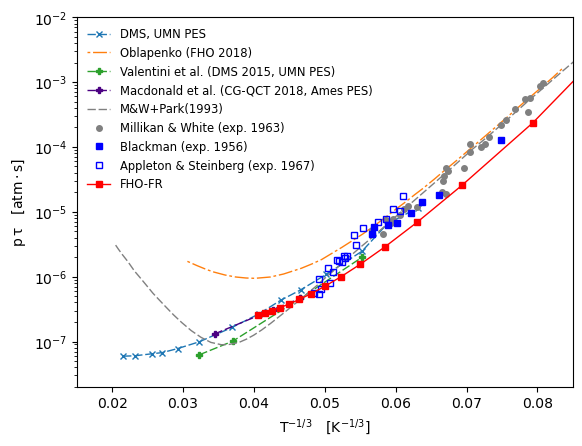

In [20]:
fig, ax = plt.subplots()

dms, = ax.plot(data['DMS'][:, 0], data['DMS'][:, 1], 'x', markersize=msize, linewidth=lwidth)
dms.set_dashes([6, 2])
dms.set_label('DMS, UMN PES')

fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth)
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

valentini_dms, = ax.plot(data['Valentini'][:, 0], data['Valentini'][:, 1], '-P', markersize=msize, linewidth=lwidth)
valentini_dms.set_dashes([6, 2])
valentini_dms.set_label('Valentini et al. (DMS 2015, UMN PES)')

macdonald_cg_qct, = ax.plot(data['Macdonald'][:, 0], data['Macdonald'][:, 1], '-P', color='indigo', markersize=msize, linewidth=lwidth)
macdonald_cg_qct.set_dashes([6, 2])
macdonald_cg_qct.set_label('Macdonald et al. (CG-QCT 2018, Ames PES)')

mw_park, = ax.plot(data['MW_Park'][:, 0], data['MW_Park'][:, 1], color='gray', linewidth=lwidth)
mw_park.set_dashes([6, 2])
mw_park.set_label('M&W+Park(1993)')

mw, = ax.plot(data['MW'][:, 0], data['MW'][:, 1], 'o', color='gray', markersize=msize)
mw.set_label('Millikan & White (exp. 1963)')

blackman, = ax.plot(data['Blackman'][:, 0], data['Blackman'][:, 1], 's', color='blue', markersize=msize)
blackman.set_label('Blackman (exp. 1956)')

ap_st, = ax.plot(data['Ap_St'][:, 0], data['Ap_St'][:, 1], 's', fillstyle='none', color='blue', markersize=msize)
ap_st.set_label('Appleton & Steinberg (exp. 1967)')

fho_fr, = ax.plot((data['FHO_FR'][:, 0]) ** (-1/3), data['FHO_FR'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
ax.set_xlim(0.015, 0.085)
ax.set_ylim(0.2e-7, 1e-2)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig(molecules[0] + '.png', dpi=600)

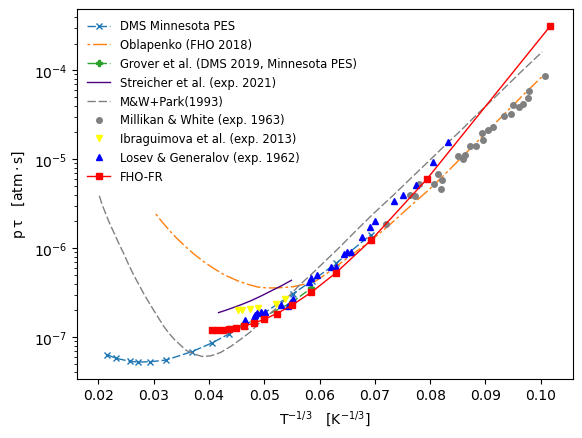

In [23]:
fig, ax = plt.subplots()

dms, = ax.plot(data['DMS'][:, 0], data['DMS'][:, 1], 'x', markersize=msize, linewidth=lwidth)
dms.set_dashes([6, 2])
dms.set_label('DMS Minnesota PES')

fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth)
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

grover_dms, = ax.plot(data['Grover_dms'][:, 0], data['Grover_dms'][:, 1], '-P', markersize=msize, linewidth=lwidth)
grover_dms.set_dashes([6, 2])
grover_dms.set_label('Grover et al. (DMS 2019, Minnesota PES)')

streicher, = ax.plot(data['Streicher'][:, 0], data['Streicher'][:, 1], color='indigo', markersize=msize, linewidth=lwidth)
streicher.set_label('Streicher et al. (exp. 2021)')

mw_park, = ax.plot(data['MW_Park'][:, 0], data['MW_Park'][:, 1], color='gray', linewidth=lwidth)
mw_park.set_dashes([6, 2])
mw_park.set_label('M&W+Park(1993)')

mw, = ax.plot(data['MW'][:, 0], data['MW'][:, 1], 'o', color='gray', markersize=msize)
mw.set_label('Millikan & White (exp. 1963)')

ibraguimova, = ax.plot(data['Ibraguimova'][:, 0], data['Ibraguimova'][:, 1], 'v', color='yellow', markersize=msize)
ibraguimova.set_label('Ibraguimova et al. (exp. 2013)')

lg, = ax.plot(data['LG'][:, 0], data['LG'][:, 1], '^', color='blue', markersize=msize)
lg.set_label('Losev & Generalov (exp. 1962)')

fho_fr, = ax.plot((data['FHO_FR'][:, 0]) ** (-1/3), data['FHO_FR'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
# ax.set_xlim(0.015, 0.085)
# ax.set_ylim(0.2e-7, 1e-2)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig(molecules[1] + '.png', dpi=600)

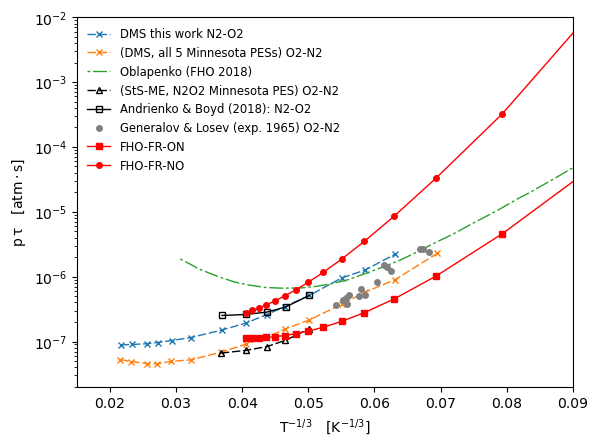

In [57]:
fig, ax = plt.subplots()

dmsno, = ax.plot(data['DMSNO'][:, 0], data['DMSNO'][:, 1], 'x', markersize=msize, linewidth=lwidth)
dmsno.set_dashes([6, 2])
dmsno.set_label('DMS this work N2-O2')

dmson, = ax.plot(data['DMSON'][:, 0], data['DMSON'][:, 1], 'x', markersize=msize, linewidth=lwidth)
dmson.set_dashes([6, 2])
dmson.set_label('(DMS, all 5 Minnesota PESs) O2-N2')

fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth)
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

sts_me, = ax.plot(data['sts_me'][:, 0], data['sts_me'][:, 1], '-^', fillstyle='none',markersize=msize, color='black', linewidth=lwidth)
sts_me.set_dashes([6, 2])
sts_me.set_label('(StS-ME, N2O2 Minnesota PES) O2-N2')

andrienko, = ax.plot(data['Andrienko'][:, 0], data['Andrienko'][:, 1], '-s', fillstyle='none', color='black', markersize=msize, linewidth=lwidth)
andrienko.set_label('Andrienko & Boyd (2018): N2-O2')

# mwno, = ax.plot(data['MWNO'][:, 0], data['MWNO'][:, 1], color='gray', linewidth=lwidth)
# ax.annotate('Eq.(3a) of M&W (1963)', xy=(0.05, 1e-06), xytext=(0.03, 1e-05),
#             arrowprops=dict(facecolor='black', lw=0.00005, linestyle='dashed', connectionstyle='angle3,angleA=0,angleB=90', arrowstyle='->'))
# 
# mwon, = ax.plot(data['MWON'][:, 0], data['MWON'][:, 1], color='gray', linewidth=lwidth)

gl, = ax.plot(data['GL'][:, 0], data['GL'][:, 1], 'o', color='gray', markersize=msize)
gl.set_label('Generalov & Losev (exp. 1965) O2-N2')

fho_fr, = ax.plot((data['FHO_FR_O2_N2'][:, 0]) ** (-1/3), data['FHO_FR_O2_N2'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR-ON')

fho_fr, = ax.plot((data['FHO_FR_N2_O2'][:, 0]) ** (-1/3), data['FHO_FR_N2_O2'][:, 1], '-o', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR-NO')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
ax.set_xlim(0.015, 0.09)
ax.set_ylim(0.2e-7, 1e-2)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig(molecules[2] + '.png', dpi=600)